# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('C:/Users/argop/OneDrive/Desktop/Python/Python Assignments/FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Write your code here
# Rows
print("number of rows : ", df.shape[0])
 
# Columns
print("number of columns : ", df.shape[1])

number of rows :  1898
number of columns :  9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# Use info() to print a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# Write your code here
print("Count total NaN at each column in a DataFrame: \n ", df.isnull().sum())
print("No missing values in any column in the data")

Count total NaN at each column in a DataFrame: 
  order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
No missing values in any column in the data


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# Write your code here
df[["cost_of_the_order","food_preparation_time","delivery_time"]].describe().applymap('{:,.1f}'.format)
print("Minimun food preparation time is",df["food_preparation_time"].min())
print("Average food preparation time is",round(df["food_preparation_time"].mean(),0))
print("Max food preparation time is",df["food_preparation_time"].max())

,cost_of_the_order,food_preparation_time,delivery_time
count,"1,898.0","1,898.0","1,898.0"
mean,16.5,27.4,24.2
std,7.5,4.6,5.0
min,4.5,20.0,15.0
25%,12.1,23.0,20.0
50%,14.1,27.0,25.0
75%,22.3,31.0,28.0
max,35.4,35.0,33.0


Minimun food preparation time is 20
Average food preparation time is 27.0
Max food preparation time is 35


#### Observations:


### **Question 5:** How many orders are not rated?

In [8]:
# Write the code here
df_ratings=df['rating'].value_counts().to_frame()

df_ratings['percent'] = round((df_ratings["rating"] / df_ratings["rating"].sum()) * 100,2)
df_ratings

print("Number of orders not rated are:",len(df[df["rating"]=="Not given"]))

,rating,percent
Not given,736,38.78
5,588,30.98
4,386,20.34
3,188,9.91


Number of orders not rated are: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

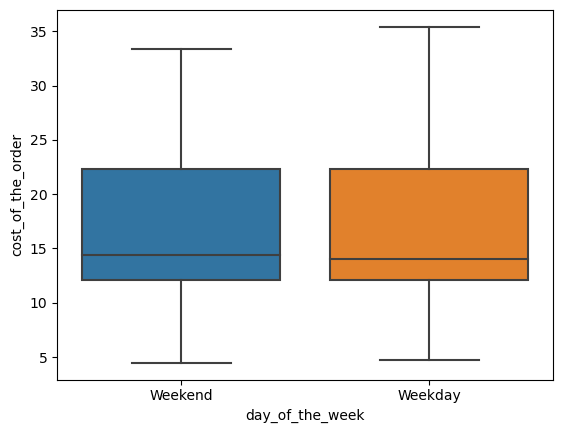

In [9]:
# Write the code here
sns.boxplot(x = 'day_of_the_week', y = 'cost_of_the_order', data = df)

<Axes: xlabel='day_of_the_week', ylabel='food_preparation_time'>

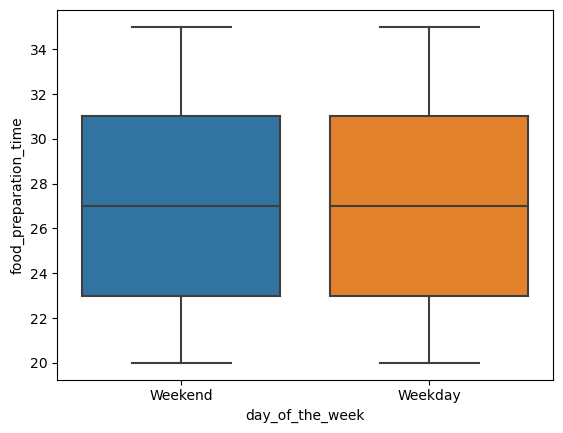

In [10]:
sns.boxplot(x = 'day_of_the_week', y = 'food_preparation_time', data = df)

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

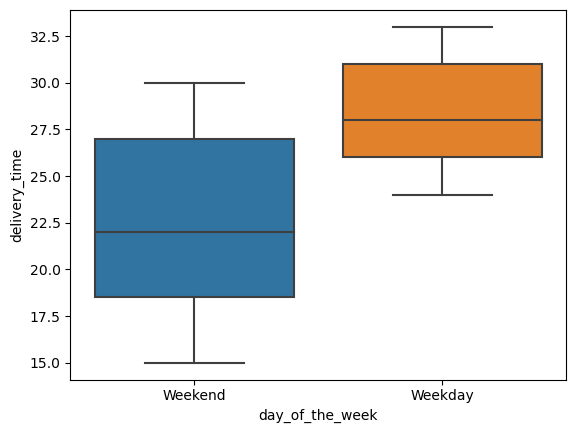

In [11]:
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)

,order_id,cost_of_the_order
day_of_the_week,,
Weekday,547,8922.22
Weekend,1351,22392.60


<Axes: xlabel='day_of_the_week', ylabel='count'>

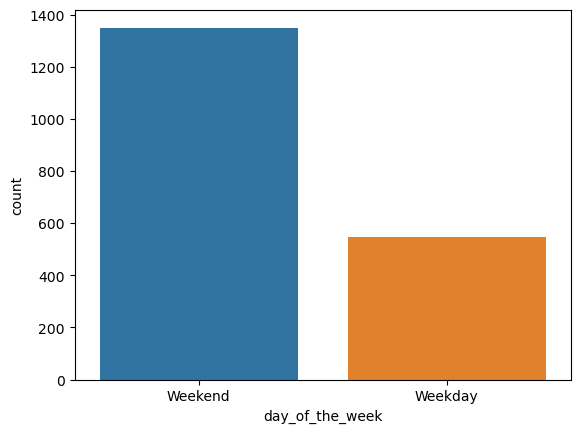

<Axes: xlabel='count', ylabel='cuisine_type'>

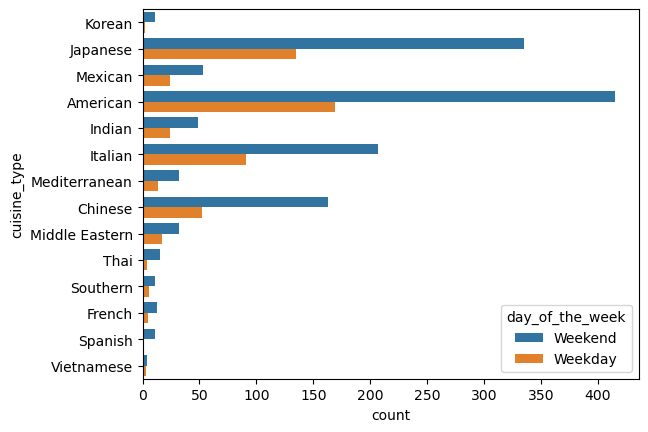

In [12]:
summary = df.groupby('day_of_the_week').agg({'order_id':'count','cost_of_the_order':'sum'})
summary

sns.countplot(x='day_of_the_week',data=df)
plt.show()

sns.countplot(y ='cuisine_type', hue = "day_of_the_week", data = df)
plt.show()


<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

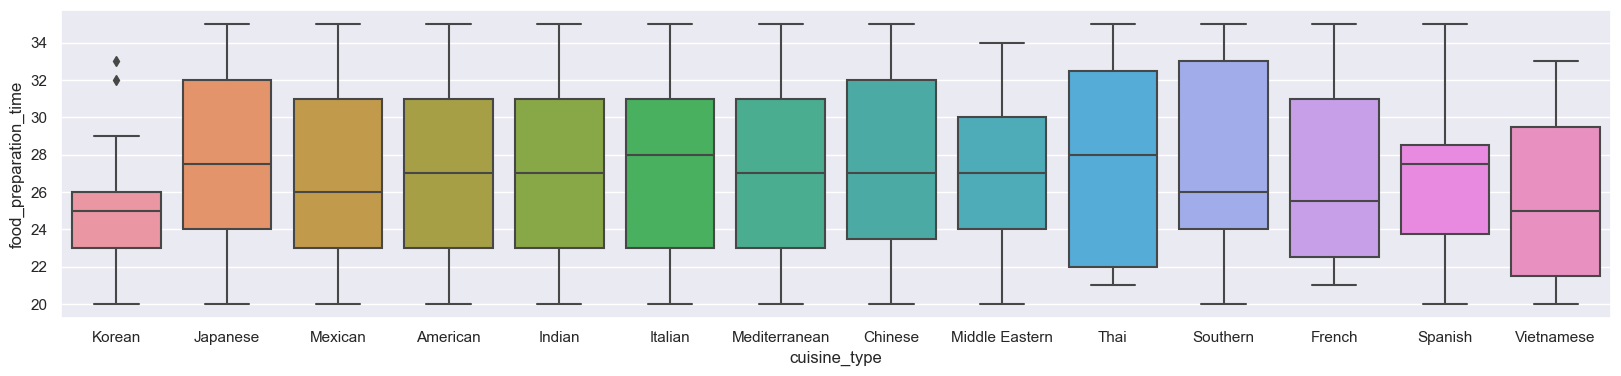

In [13]:
sns.set(rc = {'figure.figsize':(20, 4)})
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)

<Axes: xlabel='cuisine_type', ylabel='delivery_time'>

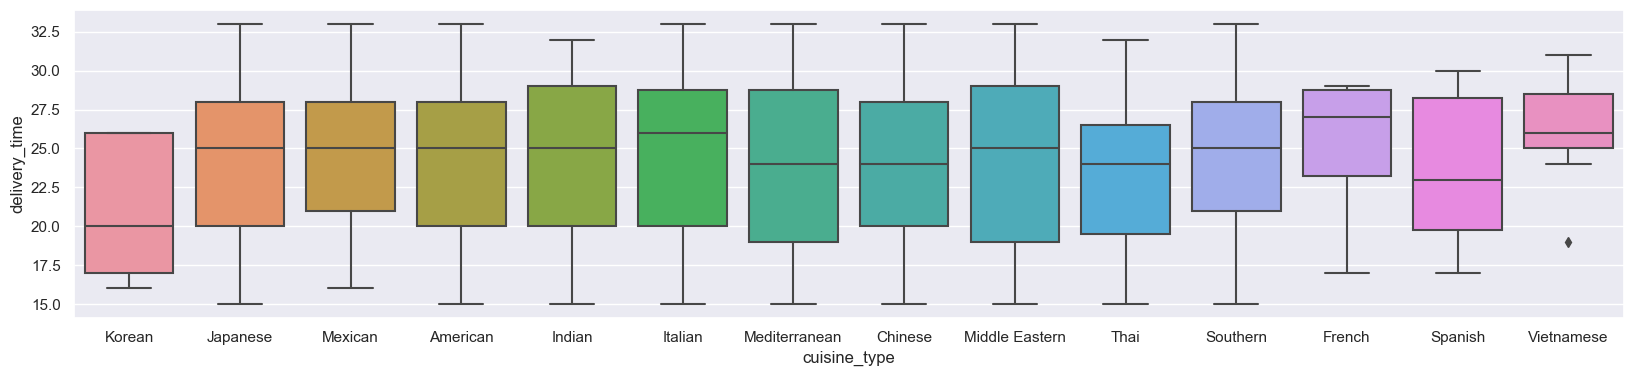

In [14]:
sns.set(rc = {'figure.figsize':(20, 4)})
sns.boxplot(x = 'cuisine_type', y = 'delivery_time', data = df)

<Axes: >

Text(0.5, 1.0, 'Top 10 restaurants in terms of order volume')

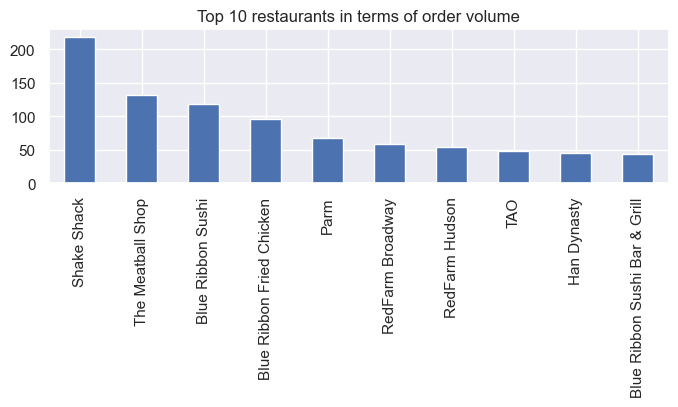

In [15]:
top_10 = df['restaurant_name'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(8,2))
plt.title('Top 10 restaurants in terms of order volume')

<Axes: xlabel='restaurant_name'>

Text(0.5, 1.0, 'Top 10 restaurants in terms of order $ amount')

There is no difference in the restaurants based on #orders or $amount


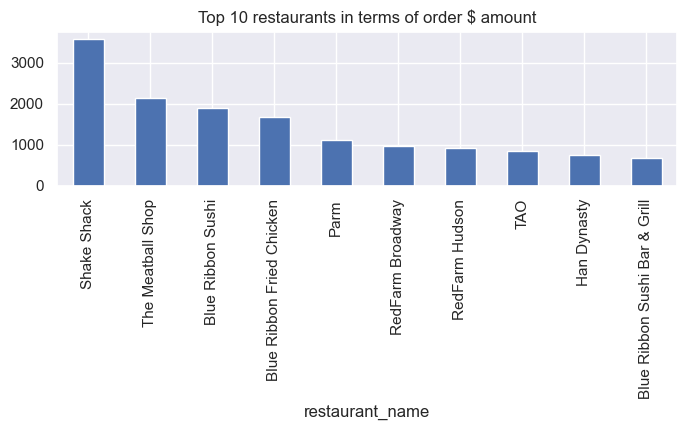

In [16]:
df_chrt = df.pivot_table(index = 'restaurant_name', values=['cost_of_the_order'],aggfunc= 'sum')
sorted_df_pivot = df_chrt.sort_values(by=['cost_of_the_order'], ascending=False)
#sorted_df_pivot.head(10)
top_10_value = sorted_df_pivot['cost_of_the_order'][:10]
top_10_value.plot(kind='bar',figsize=(8,2))
plt.title('Top 10 restaurants in terms of order $ amount')
print("There is no difference in the restaurants based on #orders or $amount")

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [17]:
# Write the code here
print("The top 5 restaurants in terms of orders received are:\n")
df[["restaurant_name"]].value_counts().head()

The top 5 restaurants in terms of orders received are:



restaurant_name          
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [18]:
# Write the code here

df_weeknd_cuisine = df.loc[df['day_of_the_week'] == 'Weekend']

df_weekday_cuisine = df.loc[df['day_of_the_week'] == 'Weekday']

#Checking for weekends
x1=df_weeknd_cuisine.groupby("day_of_the_week")["cuisine_type"].value_counts().to_frame()
x1 = x1.rename(columns={'cuisine_type':'count_orders'})
print("The popular 5 cuisines during Weekend are:\n")
x1.sort_values(by=['count_orders'],ascending=[False]).head()

#Checking for weekdays
x2=df_weekday_cuisine.groupby("day_of_the_week")["cuisine_type"].value_counts().to_frame()
x2 = x2.rename(columns={'cuisine_type':'count_orders'})
print("The popular 5 cuisines during Weekday are:\n")
x2.sort_values(by=['count_orders'],ascending=[False]).head()

The popular 5 cuisines during Weekend are:



count_orders
day_of_the_week cuisine_type              
Weekend         American               415
                Japanese               335
                Italian                207
                Chinese                163
                Mexican                 53

The popular 5 cuisines during Weekday are:



count_orders
day_of_the_week cuisine_type              
Weekday         American               169
                Japanese               135
                Italian                 91
                Chinese                 52
                Indian                  24

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [19]:
# Write the code here
df["Order_gt_20"]=df["cost_of_the_order"].apply(lambda x: 1 if x > 20 else 0)

print("Percentage of orders costing more than $20 is:",round(df["Order_gt_20"].sum() / df["order_id"].count()*100,2),"%")

Percentage of orders costing more than $20 is: 29.24 %


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [20]:
# Write the code here
print("The average order delivery time is:",round(df[["delivery_time"]].mean(),2))

The average order delivery time is: delivery_time    24.16
dtype: float64


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [21]:
# Write the code here
df_cust= df.groupby(['customer_id']).agg({'order_id': 'count', 'cost_of_the_order': 'sum'})
df_cust = df_cust.rename(columns={'order_id':'count_orders',
                                           'cost_of_the_order': 'Total_Order_Value'})

print("The top 3 customers who are eligible for 20% discount are:\n")
df_cust.sort_values(by=['count_orders'],ascending=[False]).head(3)

print("However it's recommended to identify top 3 customers based on total order value. The top 3 customers would be:\n")
df_cust2=df_cust.sort_values(by=['Total_Order_Value'],ascending=[False])
df_cust2.head(3)


The top 3 customers who are eligible for 20% discount are:



,count_orders,Total_Order_Value
customer_id,,
52832,13,225.80
47440,10,158.18
83287,9,139.31


However it's recommended to identify top 3 customers based on total order value. The top 3 customers would be:



,count_orders,Total_Order_Value
customer_id,,
52832,13,225.80
250494,8,183.83
47440,10,158.18


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

C:\Users\argop\AppData\Local\Temp\ipykernel_52112\2088855646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['rating']] = df_filtered[['rating']].apply(pd.to_numeric)


The correlation heatmap for the numerical variables:


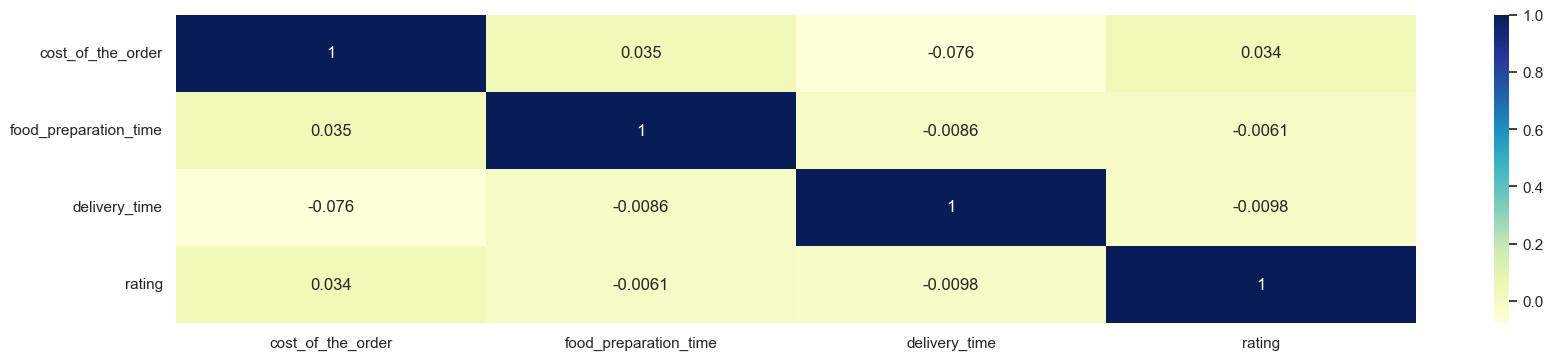

In [22]:
# Write the code here
df_filtered = df[df['rating'] != "Not given"]
df_filtered[['rating']] = df_filtered[['rating']].apply(pd.to_numeric)
cols=['cost_of_the_order','food_preparation_time','delivery_time','rating']

dataplot = sns.heatmap(df_filtered[cols].corr(), cmap="YlGnBu", annot=True)
print("The correlation heatmap for the numerical variables:")
# displaying heatmap
plt.show()

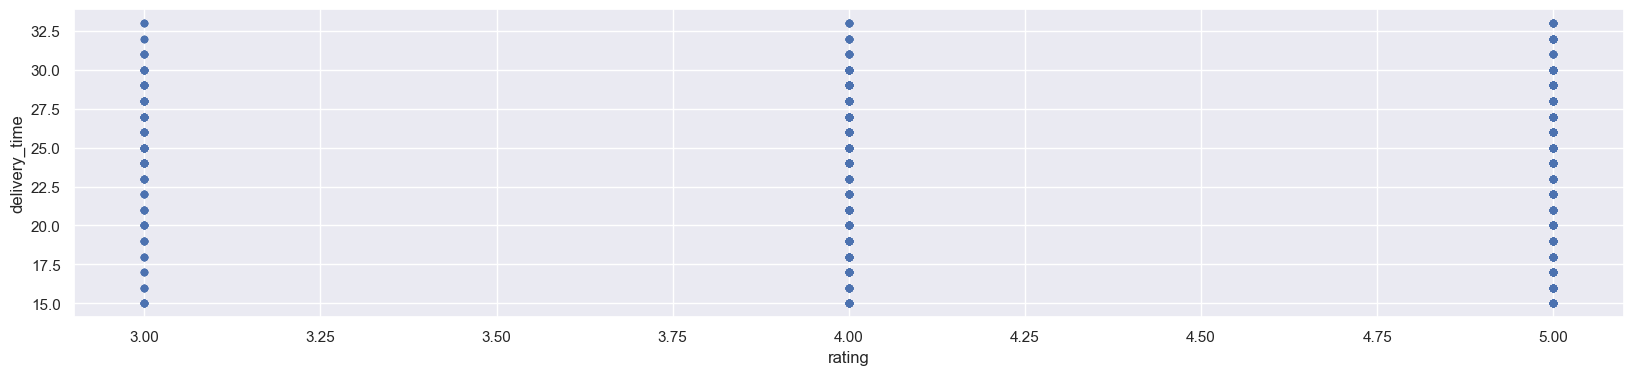

In [23]:
df_filtered.plot.scatter(x = 'rating', y = 'delivery_time');

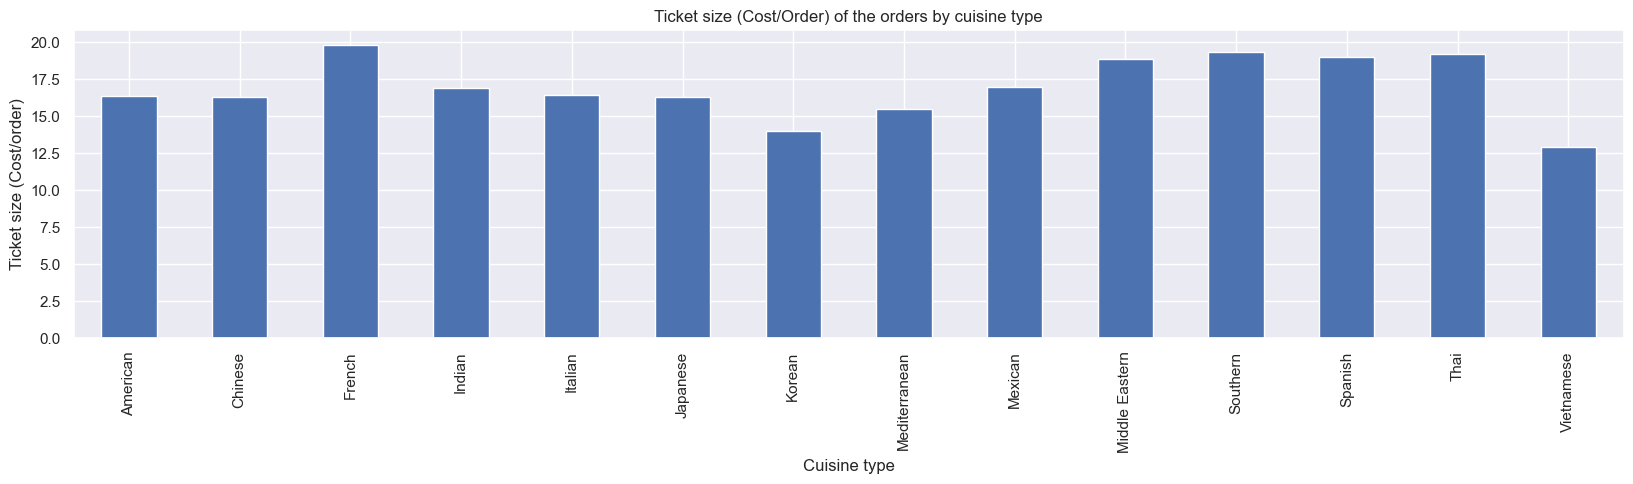

In [24]:
df_new= df.groupby(['cuisine_type']).agg({'order_id': 'count', 'cost_of_the_order': 'sum'})
df_new = df_new.rename(columns={'order_id':'Cnt_Orders',
                                           'cost_of_the_order': 'Total_Cost'})
df_new["Cost_per_order"]=df_new["Total_Cost"] / df_new["Cnt_Orders"]

#df_new

df_new["Cost_per_order"].plot.bar()
plt.title("Ticket size (Cost/Order) of the orders by cuisine type")
plt.xlabel("Cuisine type");
plt.ylabel("Ticket size (Cost/order)");


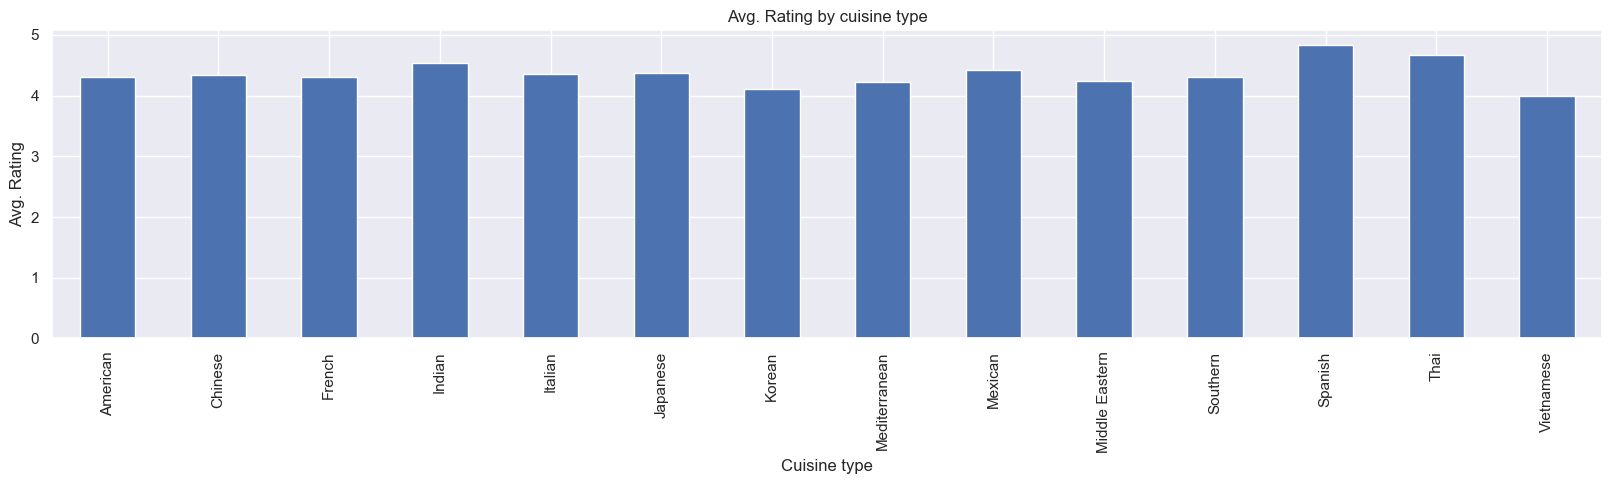

In [25]:
df_new1= df_filtered.groupby(['cuisine_type']).agg({'order_id': 'count', 'rating': 'mean'})
df_new1 = df_new1.rename(columns={'order_id':'Cnt_Orders',
                                           'rating': 'Avg_rating'})

df_new1.head()

df_new1["Avg_rating"].plot.bar()
plt.title("Avg. Rating by cuisine type")
plt.xlabel("Cuisine type");
plt.ylabel("Avg. Rating");

<Axes: ylabel='restaurant_name'>

Text(0.5, 1.0, 'Avg. Rating by restaurants with at least 20 orders')

Text(0, 0.5, 'Restaurant')

Text(0.5, 0, 'Avg. Rating')

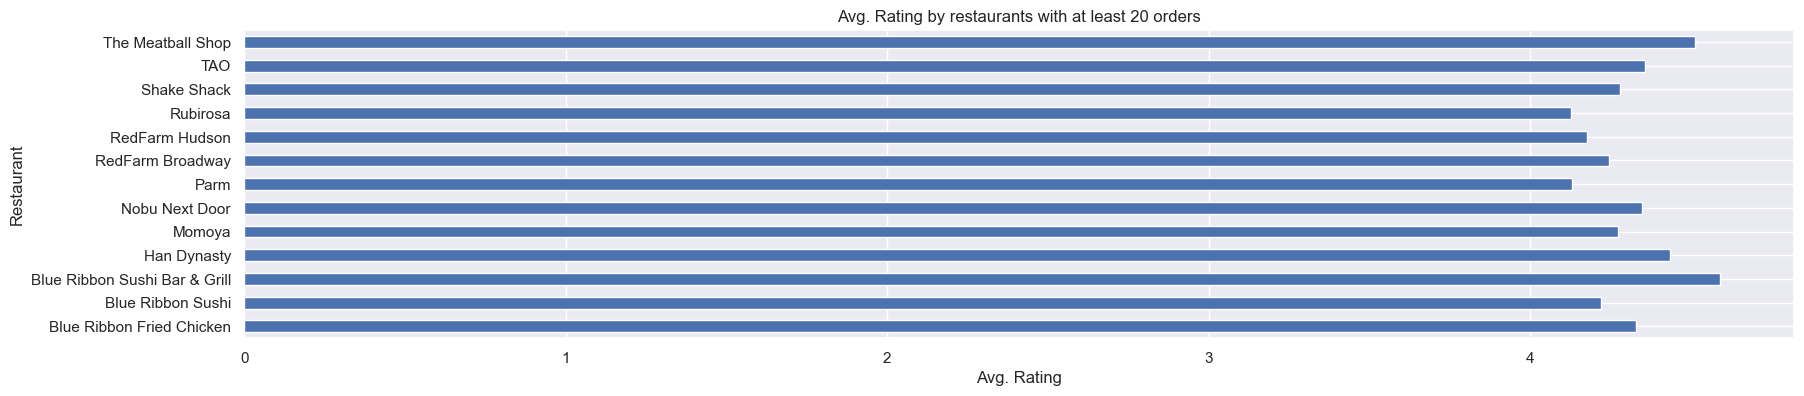

In [26]:
df_new2= df_filtered.groupby(['restaurant_name']).agg({'order_id': 'count', 'rating': 'mean'})
df_new2 = df_new2.rename(columns={'order_id':'Cnt_Orders',
                                           'rating': 'Avg_rating'})


df_new2 = df_new2[df_new2['Cnt_Orders'] > 20]
#df_new2.sort_values(by=['Avg_rating'],ascending=[False])
#df_new2.head()

df_new2['Avg_rating'].plot(kind="barh")
plt.title("Avg. Rating by restaurants with at least 20 orders")
plt.ylabel("Restaurant")
plt.xlabel("Avg. Rating")

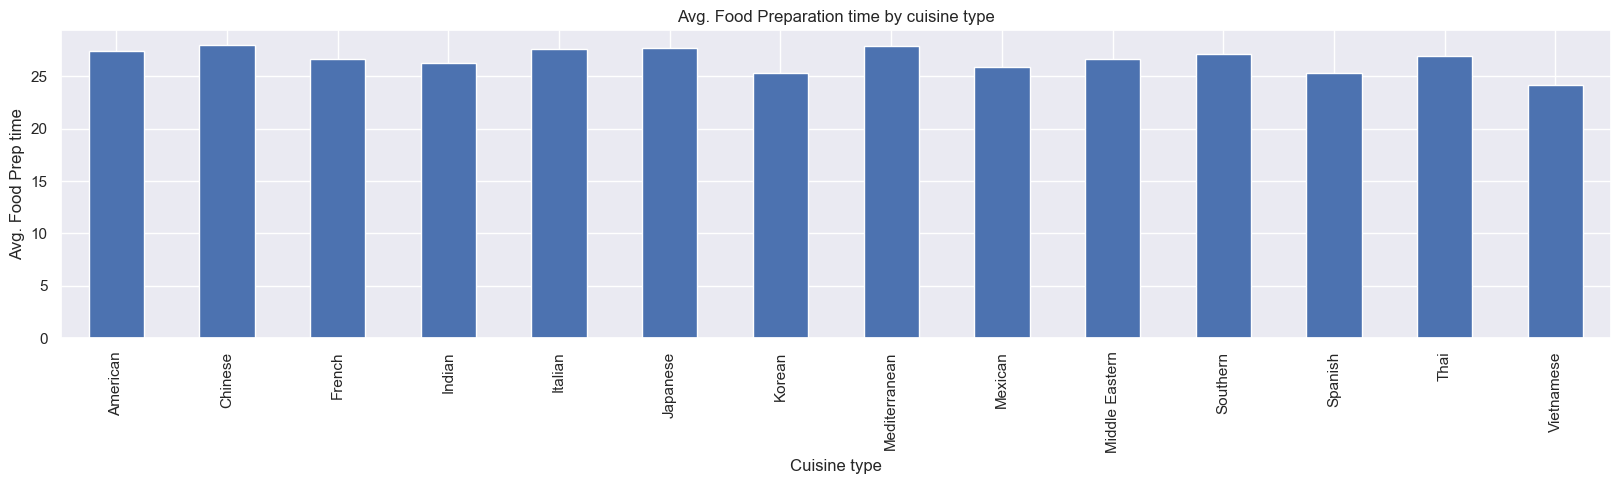

In [27]:
df_new3= df_filtered.groupby(['cuisine_type']).agg({'order_id': 'count', 'food_preparation_time': 'mean'})
df_new3 = df_new3.rename(columns={'order_id':'Cnt_Orders',
                                           'food_preparation_time': 'Avg_Food_Prep_Time'})


df_new3["Avg_Food_Prep_Time"].plot.bar()
plt.title("Avg. Food Preparation time by cuisine type")
plt.xlabel("Cuisine type");
plt.ylabel("Avg. Food Prep time");

<Axes: ylabel='restaurant_name'>

Text(0.5, 1.0, 'Avg. Food Prep by restaurants with at least 20 orders')

Text(0, 0.5, 'Restaurant')

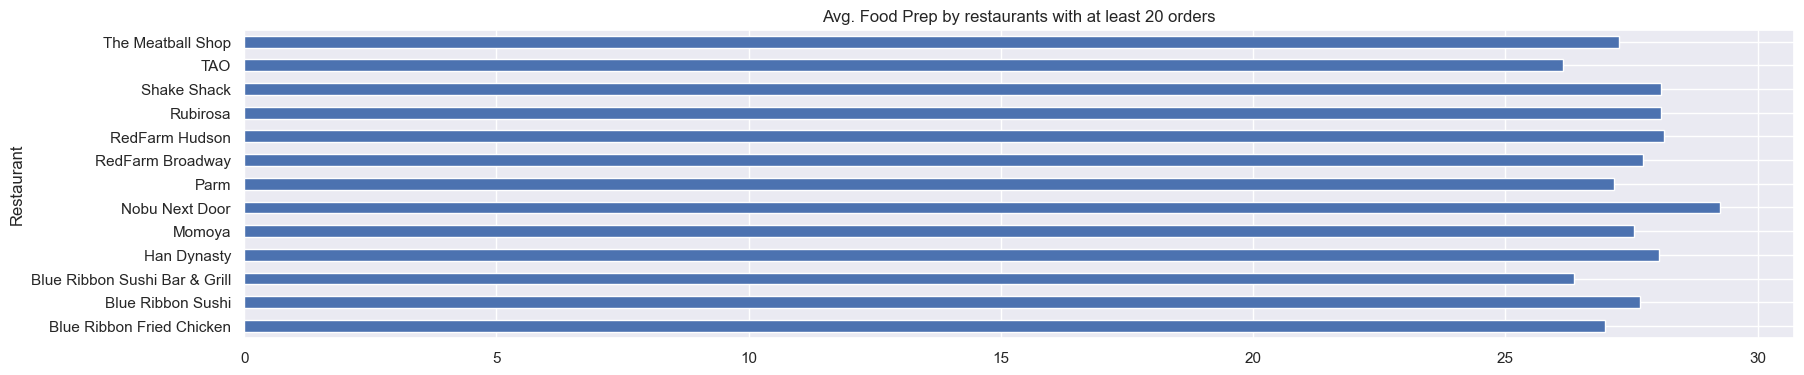

In [28]:
df_new4= df_filtered.groupby(['restaurant_name']).agg({'order_id': 'count', 'food_preparation_time': 'mean'})
df_new4 = df_new4.rename(columns={'order_id':'Cnt_Orders',
                                           'food_preparation_time': 'Avg_Food_Prep_Time'})


df_new4 = df_new4[df_new4['Cnt_Orders'] > 20]
#df_new4.head()

df_new4['Avg_Food_Prep_Time'].plot(kind="barh")
plt.title("Avg. Food Prep by restaurants with at least 20 orders")
plt.ylabel("Restaurant")
#df_chart=df.pivot_table(values=['order_id'], index = 'day_of_the_week', aggfunc= ['count'])plt.xlabel("Avg. Food Prep time")

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [29]:
# Write the code here

#----------------(1) To get the avg rating ----------------
#But first have to convert rating to numeric column. For that have to first drop the rows having "Not given" value in the rating column
df_filtered = df[df['rating'] != "Not given"]
df_filtered[['rating']] = df_filtered[['rating']].apply(pd.to_numeric)
#df_filtered.dtypes


df_ratingavg= df_filtered.groupby("restaurant_name").agg({'order_id': 'count', 'rating': 'mean'})
df_ratingavg = df_ratingavg.rename(columns={'order_id':'Cnt_Orders_with_Rating',
                                           'rating': 'Avg_Rating'})
#df_ratingavg

#---------------(2) To get the Number of orders without dropping the rows having "Not given" rating-------------
df_ordercnt = df.groupby("restaurant_name")["order_id"].count().to_frame()
df_ordercnt=df_ordercnt.rename(columns={'order_id':'Cnt_Total_Orders'})
#df_ordercnt

#---------------(3) To get the final results - merge the two datasets and applying the required conditions-----------
df_v2 = pd.merge(df_ordercnt,df_ratingavg,on="restaurant_name",how="left")
df_v3 = df_v2[(df_v2['Cnt_Total_Orders'] >= 50) & (df_v2['Avg_Rating'] > 4)]
print("The restaurants meeting the two conditions and thus eligible for the Promo offer are:\n")
df_v3.sort_values(by=['Cnt_Total_Orders'],ascending=[False])

The restaurants meeting the two conditions and thus eligible for the Promo offer are:



C:\Users\argop\AppData\Local\Temp\ipykernel_52112\3633023421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['rating']] = df_filtered[['rating']].apply(pd.to_numeric)


,Cnt_Total_Orders,Cnt_Orders_with_Rating,Avg_Rating
restaurant_name,,,
Shake Shack,219,133.0,4.278195
The Meatball Shop,132,84.0,4.511905
Blue Ribbon Sushi,119,73.0,4.219178
Blue Ribbon Fried Chicken,96,64.0,4.328125
Parm,68,39.0,4.128205
RedFarm Broadway,59,41.0,4.243902
RedFarm Hudson,55,34.0,4.176471


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [30]:
conditions = [
    (df['cost_of_the_order'] <= 5),
    (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20),
    (df['cost_of_the_order'] > 20)
     ]
     
values = ['1. Less than 5', '2. 5 to 19', '3. More than 20']

df['Cost_buckets'] = np.select(conditions, values)
#df.head()

df['Revenue'] = np.where(df['Cost_buckets'] == '2. 5 to 19', df['cost_of_the_order'] * 0.15,np.where(
    df['Cost_buckets'] == '3. More than 20', df['cost_of_the_order'] * 0.25,0))

print("The total Revenue earned by FoodHub is: $", df['Revenue'].sum())

print("The total Revenue earned by FoodHub broken up by the cost buckets is:\n")
round(df.pivot_table(values=['Revenue','cost_of_the_order'], index = 'Cost_buckets', aggfunc= 'sum', margins = True, margins_name='Total'),2)
                         

The total Revenue earned by FoodHub is: $ 6166.303
The total Revenue earned by FoodHub broken up by the cost buckets is:



,Revenue,cost_of_the_order
Cost_buckets,,
1. Less than 5,0.00,42.74
2. 5 to 19,2477.58,16517.17
3. More than 20,3688.73,14754.91
Total,6166.30,31314.82


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [31]:
# Write the code here
cols=["food_preparation_time","delivery_time"]
df["Order_to_Delivery_time"]=df[cols].sum(axis=1)
#df.head(2)

df["Delivery_gt_60"]=df["Order_to_Delivery_time"].apply(lambda x: 1 if x > 60 else 0)
#df.head(2)

print("Percentage of orders taking more than 60 mins is:",round(df["Delivery_gt_60"].sum() / df["order_id"].count()*100,2),"%")


Percentage of orders taking more than 60 mins is: 10.54 %


In [32]:
df_filtered1 = df[df['rating'] != "Not given"]
df_filtered1[['rating']] = df_filtered1[['rating']].apply(pd.to_numeric)

print("The average rating by the Total time to deliver food buckets - 0: less than 60 mins and 1: more than 60 mins")
df_filtered1.groupby("Delivery_gt_60")["rating"].mean()
print("No difference in the average rating for the two groups")

The average rating by the Total time to deliver food buckets - 0: less than 60 mins and 1: more than 60 mins


C:\Users\argop\AppData\Local\Temp\ipykernel_52112\2411087805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[['rating']] = df_filtered1[['rating']].apply(pd.to_numeric)


Delivery_gt_60
0    4.343241
1    4.352941
Name: rating, dtype: float64

No difference in the average rating for the two groups


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [33]:
# Write the code here
print("The average delivery time for weekday vs. weekend is:")
round(df.groupby("day_of_the_week")["delivery_time"].mean(),2)

The average delivery time for weekday vs. weekend is:


day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

### Some additional analysis

The top 10 restaurants by order volume contribute to 46.0 % of the total order amount


<Axes: xlabel='restaurant_name'>

Text(0.5, 1.0, 'Cumulative order amount contribution of the Top 10 restaurants')

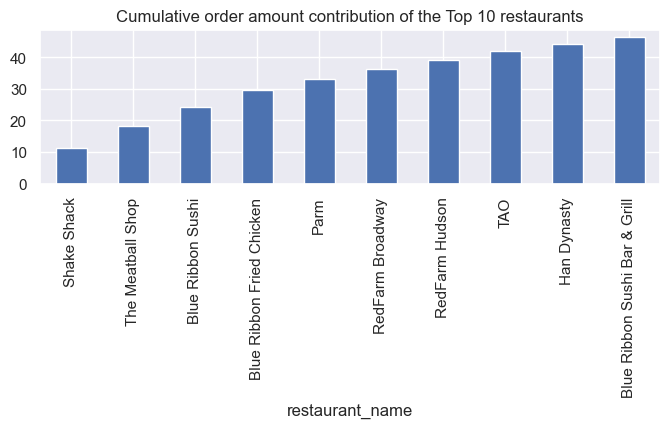

In [34]:
#----------------(1) To get top 10 restaurants by order count ----------------
#But first have to convert rating to numeric column. For that have to first drop the rows having "Not given" value in the rating column
df_order_cnt = df.groupby("restaurant_name")["order_id"].count().to_frame()
df_order_cnt=df_order_cnt.rename(columns={'order_id':'Total_Orders'})
df_order_cnt_2=df_order_cnt.sort_values(by=['Total_Orders'],ascending=[False]).head(10)
#df_order_cnt_2.head()

#---------------(2) To get the Order amount of all the restaurants-------------
df_order_amt = df.groupby("restaurant_name")["cost_of_the_order"].sum().to_frame()
df_order_amt=df_order_amt.rename(columns={'cost_of_the_order':'Order_Amt'})
df_order_amt=df_order_amt.sort_values(by=['Order_Amt'],ascending=[False])
df_order_amt['cum_percent'] = round((df_order_amt.Order_Amt.cumsum() / df_order_amt.Order_Amt.sum())*100,2)
df_order_amt['percent'] = (df_order_amt['Order_Amt'] / df_order_amt['Order_Amt'].sum()) * 100
#df_order_amt.head()

#---------------(3) To get the final results - merge the two datasets -----------
df_merge = pd.merge(df_order_cnt_2,df_order_amt,on="restaurant_name",how="left")
#df_merge.head()

order_amt_top10 = df_merge["Order_Amt"].sum()
contr_pcnt = round((order_amt_top10/df["cost_of_the_order"].sum())*100,0)
print("The top 10 restaurants by order volume contribute to", contr_pcnt,"% of the total order amount")

top_10_value_cum = df_order_amt['cum_percent'][:10]
top_10_value_cum.plot(kind='bar',figsize=(8,2))
plt.title('Cumulative order amount contribution of the Top 10 restaurants')

<Axes: xlabel='restaurant_name'>

Text(0.5, 1.0, 'Order amount contribution of the Top 10 restaurants individually')

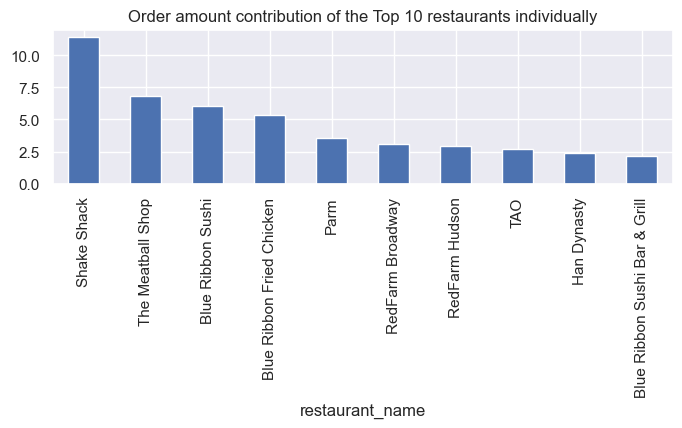

In [35]:
top_10_value_abs = df_order_amt['percent'][:10]
top_10_value_abs.plot(kind='bar',figsize=(8,2))
plt.title('Order amount contribution of the Top 10 restaurants individually')

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* Delivery time significantly increases during the weekday
* The number of orders is more than 2x in the weekend compared to the weekday
* The top 10 restaurants in terms of order volume contribute to 46.0 % of the total order amount
* Food preparation or Delivery time bears no such effect on the cuisine or restaurant selected for ordering
* Food preparation time and Food delivery time have a slight negative impact on Rating as the correlation is negative, but the correlation is quite weak
* The top 5 cuisines ordered does not change much between weekday to weekend. The top five cuisines are American, Japanese, Italian, Chinese, and Mexican
* The ticket size of the orders (order amount/#order) is the highest for French cuisine and lowest for Vietnamese cuisine
* The ratings are quite similar across the different cuisines. But Spanish has the highest average rating, closely followed by Thai and Indian cuisines

### Recommendations:

*  Recommend FoodHub to provide discounts to customers based on the Total order amount and not on #orders. There can be a condition applied on the minimum number of orders (say 5) to be eligible for the discount

---